# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

Importamos las librerías y cargamos la base de datos

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

series_2 = pd.read_csv('data_arma.csv', header=0, index_col=0, squeeze=True)

#### Análisis primera serie de tiempo 'ts1'

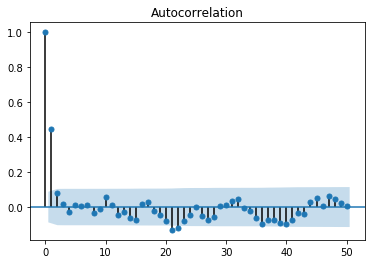

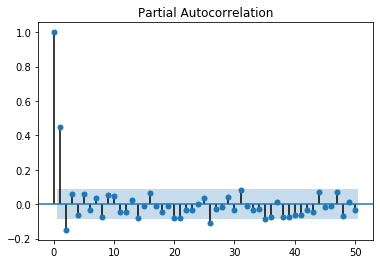

In [2]:
plot_acf(series_2['ts1'], lags=50);
plot_pacf(series_2['ts1'], lags=50);

Podemos observar en los gráficos anteriores que la autocorrelación (ACF) y la autocorrelación parcial (PACF) para el primer rezago es significativa y se reduce drasticamente para las demás observaciones.

Por tanto, podemos concluir que la serie pertenece a una <b>Media móvil de orden 1 (MA1)<b/>

#### Análisis primera serie de tiempo 'ts2'

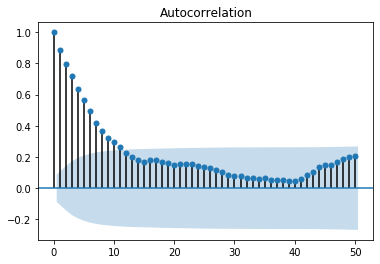

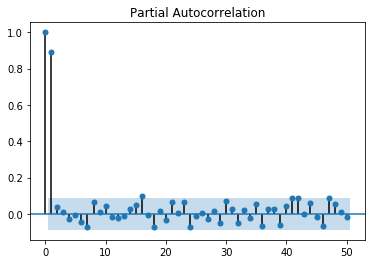

In [3]:
plot_acf(series_2['ts2'], lags=50);
plot_pacf(series_2['ts2'], lags=50);

Podemos observar que la autorrelación desde el primer rezago se reduce de manera constante en los siguientes rezagos, mientras que la autocorrelación parcial solo es significativa para la primera observación.

Por tanto, podemos concluir que la serie pertenece a un <b>Modelo Autoregresivo de orden 1 (AR1)<b/>

#### Análisis primera serie de tiempo 'ts3'

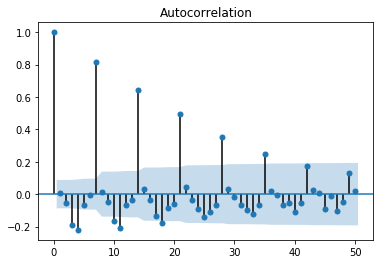

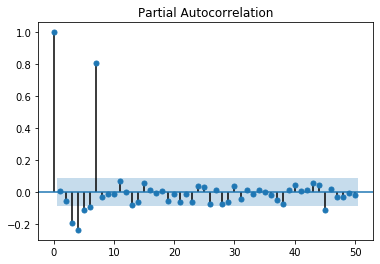

In [4]:
plot_acf(series_2['ts3'], lags=50);
plot_pacf(series_2['ts3'], lags=50);

Podemos observar que la autorrelación (ACF) es significativa cada 7 rezagos, mientras que la autocorrelación parcial (PACF) es altamente significativa para la séptima observación.

Por tanto, podemos concluir que la serie pertenece a un <b>Modelo Autoregresivo de orden 7 (AR7)<b/>

#### Análisis primera serie de tiempo 'ts4'

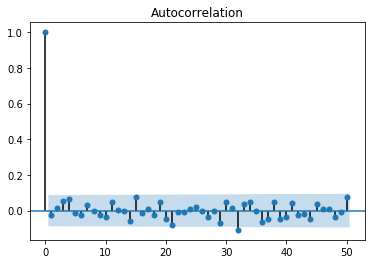

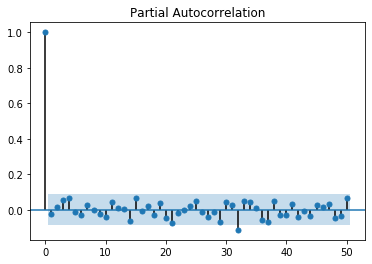

In [5]:
plot_acf(series_2['ts4'], lags=50);
plot_pacf(series_2['ts4'], lags=50);

Podemos observar que ninguna autocorrelación o autocorrelación parcial es significativa.

Por tanto, podemos concluir que la serie pertenece a un <b>proceso random o caminata aleatoria<b/>

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [6]:
import warnings
warnings.filterwarnings("ignore")

Importamos librerías y cargamos la base de datos.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set()

def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Creamos un loop utilizando el algoritmo de ARIMA que indique los valores de <b>'p'</b> y <b>'q'</b> que minimicen el MSE.

In [8]:
df=pd.DataFrame(np.array([[0,1],[1,1],[2,1],[3,1],[4,1],[5,1]])
                  ,columns=['p', 'q'])

diccionario = { 'error' : [], 'p1' : [], 'q1' :[]}

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


for i in range (len(df)):
    history = [x for x in train]
    predictions = list()
    p2 = df['p'].iloc[i]
    q2 = df['q'].iloc[i]
    for t in range(len(test)):
        model = ARIMA(history, order=(p2,1,q2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    diccionario['error'].append (mean_squared_error(test, predictions))
    diccionario['p1'].append (p2)
    diccionario['q1'].append (q2)
       
valor = diccionario['error'].index(min(diccionario['error']))
print('Parametros que minimizan el MSE del rolling forecast')
print ('El valor de p es = '+str(diccionario['p1'][valor]) +" y el valor q es = " + str(diccionario['q1'][valor]))
print('El MSE mínimo es '+str(diccionario['error'][valor]))

Parametros que minimizan el MSE del rolling forecast
El valor de p es = 4 y el valor q es = 1
El MSE mínimo es 6796.243775362458
